# Neural Network

***

pip install tensorflow at cmd

## MNIST Handwriting recognition

- It has 55k training images
- 10k test images
- 5k validation images
- There are several built in utility functions to access the data

***

### 1. Import MNIST Data using TensorFlow

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("official/mnist/dataset.py", one_hot=True)
# one_hot=True - one hot encoding will load the data in such a way that only one of the digits has the value of 1.
# which digit is 1, then we know the label

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting official/mnist/dataset.py\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting official/mnist/dataset.py\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting official/mnist/dataset.py\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting official/mnist/dataset.py\t10k-labels-idx1-ubyte.gz


***

### 2. Check the type of Dataset

In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

***

### 3. Array of Training Images

In [8]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

***

### 4. Number of Images for Training, Testing and Validation

In [9]:
mnist.train.num_examples

55000

In [10]:
mnist.test.num_examples

10000

In [11]:
mnist.validation.num_examples

5000

**Altogether 70,000 images**

***

### 5. Visualising the Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
mnist.train.images.shape

(55000, 784)

In [13]:
mnist.train.images[1].shape

(784,)

In [35]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

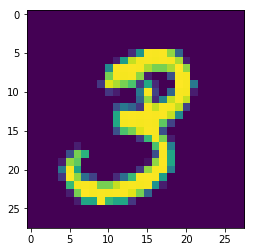

In [14]:
plt.imshow(mnist.train.images[1].reshape(28,28))

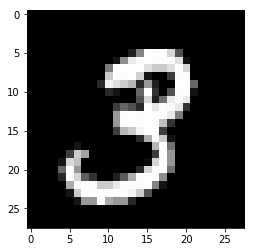

In [15]:
# View in greyscale
plt.imshow(mnist.train.images[1].reshape(28,28), cmap='gist_gray')

***

### 6. Maximum and minimum value of the pixels in the image

In [16]:
# 1 is white
mnist.train.images[1].max()

1.0

In [17]:
# 0 is black
mnist.train.images[1].min()

0.0

***

### 7. Train the model

In [18]:
# placeholder() - to get the data to the neural network
x = tf.placeholder(tf.float32, shape=[None, 784])

In [21]:
# W - weights
# 10 because 0-9 possible numbers - 10 Neurons - every Neuron takes all 784 inputs (pixels)
W = tf.Variable(tf.zeros([784,10]))

In [22]:
# b - biases
# 10 Neurons, so 10 biases
b = tf.Variable(tf.zeros([10]))

In [23]:
# Create the Graph
# matmul- matrices multiplication
y = tf.matmul(x,W) + b

**Loss and Optimizer**

In [24]:
# Labelled value
y_true = tf.placeholder(tf.float32,[None, 10])

In [26]:
# Cross Entropy
# reduce_mean() - reduce the error
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [27]:
# GradientDescentOptimizer is used
# Need to find the optimum learning rate
# too high - neural network would not converge
# too low - might take forever to run
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [28]:
train = optimizer.minimize(cross_entropy)

***

### 8. Create the Session and Evaluate the trained model on test data.

In [29]:
# Initialise the variable
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init) # initialisation of the variable happens
    
    # Train the model for 1000 steps on the training set.
    # Using built in batch feeder from mnist for convenience.
    
    for step in range(1000):
        # Can specify certain accuracy for exit criteria
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
        
        # 9. Evaluate the trained model on test data
        
    matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
        
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
        
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.9179
